## Before you begin

1. Install [Anaconda](https://www.anaconda.com/download/#macos) (or [Miniconda](https://conda.io/miniconda.html))
    * This gives you access to the `conda` Python package management system
    * **Windows Users**: You may want to opt for the full install of Anaconda. This will give you "Anaconda Prompt" which will make it easier for you to follow along here.
    
2. Using conda in a terminal window (or Anaconda prompt in Windows), create a virtual environment called 'ImPyClass' that uses Python3:

    ```bash
    conda create -n ImPyClass python=3
    ```
  
3. Switch to the ImPyClass virtual environment

      macOS, Linux: `source activate ImPyClass`
      
      Windows: `activate ImPyClass`
      
4. Install Scikit-Image, Numpy, Jupyter, and NB_Conda:

    ```bash
    conda install scikit-image numpy jupyter nb_conda
    ```
5. Launch Jupyter from the Anaconda launcher or command line, then open this notebook (1-Images_are_arrays.ipynb)

# Part 1: Images are Arrays

## 2-D color images

In [1]:
# The first thing we need to do is import the right packages for dealing with image files
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# This next line will enable us to view output in the notebook
%matplotlib inline

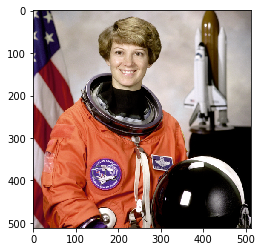

In [2]:
# scikit-image comes with some example data. Lets load some 
image = data.astronaut()

# Lets first take a look using the plt.imshow() function
plt.imshow(image);

In [3]:
# so what type of data is "image"?
type(image)

numpy.ndarray

### Read all about numpy.ndarrays [here](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html)

In [4]:
# Python will show you a snippet of the array if you just call it
# But this is not terribly useful
image

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [5]:
# check some of the attributes of our numpy.ndarray

# dimensions
image.ndim

3

In [6]:
# size of each dimension (why does this image have three dimensions?)
image.shape

(512, 512, 3)

In [7]:
# type of data
image.dtype

dtype('uint8')

In [8]:
# you can also use numpy.ndarray object methods
flat_image = image.flatten() #what does this do?
flat_image.shape

(786432,)

In [9]:
# you can use indexing to select just parts of the array
face = image[0:200, 150:300, 0]
face.shape

(200, 150)

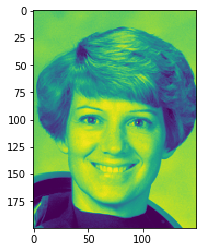

In [10]:
# lets take a look at the cropped image using plt.imshow()
plt.imshow(face);

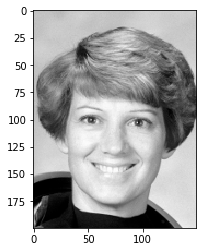

In [11]:
# The cmap parameter can be used to make this look more like what we would expect
plt.imshow(face, cmap='gray');

In [12]:
# very small arrays are a little easier to visualize as images
eye = face[97:102, 50:55]
eye

array([[102,  96, 106, 101, 103],
       [ 75,  51,  57,  61,  63],
       [ 80,  59,  71,  57,  41],
       [ 81,  69, 146, 161,  42],
       [ 83,  85, 116, 107,  35]], dtype=uint8)

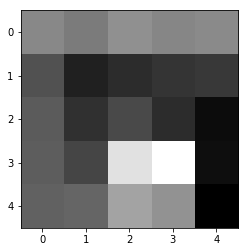

In [13]:
# compare the image with the array above
plt.imshow(eye, cmap='gray');

In [14]:
# we can easily perform math on our numpy.ndarray
eye - 34

array([[ 68,  62,  72,  67,  69],
       [ 41,  17,  23,  27,  29],
       [ 46,  25,  37,  23,   7],
       [ 47,  35, 112, 127,   8],
       [ 49,  51,  82,  73,   1]], dtype=uint8)

# Exercises

1. Display a cropped color image of the astronaut's* face.
2. Display a cropped color image of the model space shuttle in the image.
3. Display each color channel of image\[0:200, 0:100\] in grayscale.
    - Which channel is red?
    - Which channel is blue?
    - Which channel is green?

*Retired astronaut Colonel Eileen Collins, the first woman to pilot and command the Space Shuttle

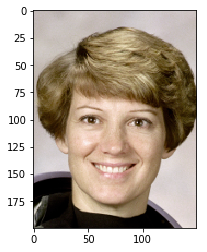

In [15]:
plt.imshow(image[0:200, 150:300, :]);

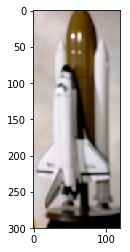

In [16]:
plt.imshow(image[0:300, 350:470, :]);

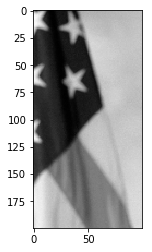

In [17]:
# this is red; notice the stripe is lighter than in the other channels
plt.imshow(image[0:200, 0:100, 0], cmap='gray'); 

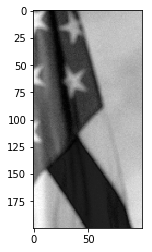

In [19]:
#this is blue, notice the the lightness of the blue field compared to the other channels
plt.imshow(image[0:200, 0:100, 2], cmap='gray'); 

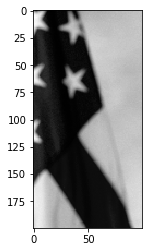

In [18]:
#this has to be green
plt.imshow(image[0:200, 0:100, 1], cmap='gray'); 

## 3-D images

In [20]:
# Now lets create an image volume of 2x3x4 'voxels' (like pixels, but volume)
# Remember the 4th dimension is color!
# So we start with an empty array of 4 dimensions, where the 4th dimension gets our color (RGB) information
cube = np.zeros([2,3,4,3], dtype='uint8')
cube.shape

(2, 3, 4, 3)

In [21]:
# Now lets set some pixels in our cube
cube[0,0,0,0] = 255 #red
cube[1,1,1,1] = 255 #green
cube[1,2,2,2] = 255 #blue
cube[0,2,3,:] = 255 #white

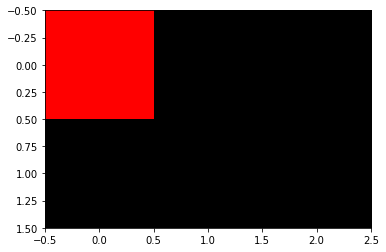

In [24]:
# We need to visualize this one plane at a time, because this is a 3-D image and our screen is 2-D!
plt.imshow(cube[:,:,0,:]);

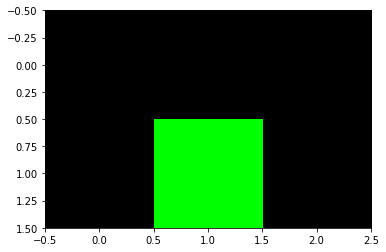

In [25]:
plt.imshow(cube[:,:,1,:]);

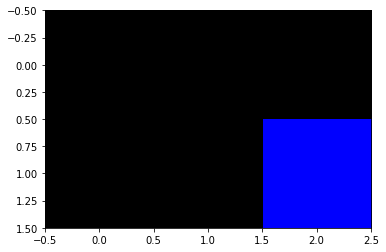

In [26]:
plt.imshow(cube[:,:,2,:]);

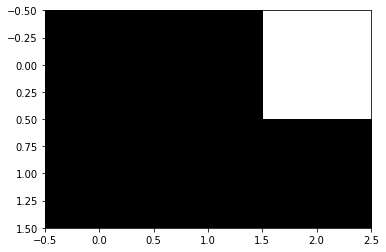

In [31]:
plt.imshow(cube[:,:,3,:]);

-----------
### **Break to explore what this looks like in 3-D space**
-----------

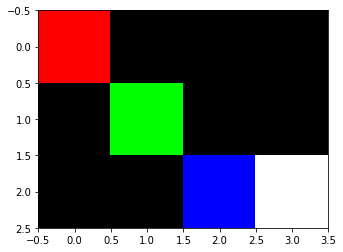

In [32]:
# If we take the maximum value along an axis, we can can view a "projection" of the volume
plt.imshow(cube.max(axis=0))

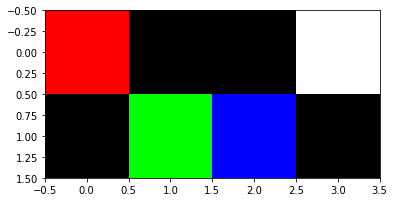

In [33]:
plt.imshow(cube.max(axis=1))

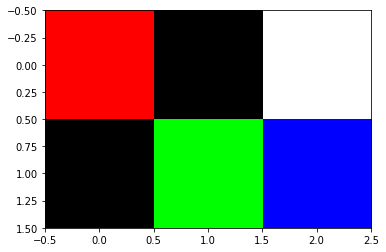

In [34]:
plt.imshow(cube.max(axis=2))

## Fun advanced stuff (demo)

In [35]:
from ipywidgets import interact
import ipywidgets as widgets

In [36]:
def f(x):
    plt.imshow(cube[:,:,x,:])
    
def im_max(x):
    plt.imshow(cube.max(axis=x))

In [37]:
interact(f, x=widgets.IntSlider(min=0, max=3));

interactive(children=(IntSlider(value=0, description='x', max=3), Output()), _dom_classes=('widget-interact',)…

In [38]:
interact(im_max, x=widgets.IntSlider(min=0, max=2));

interactive(children=(IntSlider(value=0, description='x', max=2), Output()), _dom_classes=('widget-interact',)…